# Coursework 1 - Mathematics for Machine Learning

## CID: 02476922

**Colab link:** insert colab link here

***
***

## Part 1: Quickfire questions [3 points]

#### Question 1 (True risk / Empirical risk):

Let $\hat{\mathcal{F}}$ be the full class of functions $f:\mathcal{X} \to \mathcal{Y}$. Assume we have data $(x,y) \sim D = \mathcal{X} \times \mathcal{Y}$. Consider a loss function $L:\mathcal{Y}\times\mathcal{Y} \to \mathbb{R}$.

We define the true risk, for a sample from the data generating distribution $\mathcal{D}$, and a specific function in the full class of functions $\hat{\mathcal{F}}$ as the expectation of the loss function over the data generating distribution $R(f) := \mathbb{E}_D[L(f(x),y)]$. We then seek an $\hat{F}$ that minimizes this.

However, in practical situations, we do not know $D$. Hence we approximate the true risk with the empirical risk, which, for a sample $(x^{(i)},y^{(i)})_{i=1}^N$ assumed to be iid from $D$, is the average loss over the sample (which would converge to the true expectation by LLN), which is defined as $\hat{R}(f) := \frac{1}{N}\sum_{i=1}^N L(f(x^{(i)}),y^{(i)})$.

The key difference is that the true risk is the actual thing we are trying to minimize, however it is intractable due to the expectation over the unknown data generating distribution, so we approximate it with the empirical risk, the average loss over a sample. We then seek to minimize the empirical risk instead.

#### Question 2 ('Large' or 'rich' hypothesis class):

In reality, we do not know the true full class of functions $\hat{\mathcal{F}}$, so we choose a candidate $\mathcal{F}$.

The benefits of a large hypothesis class are that they can in general contain a much wider class of function than small hypothesis classes, meaning, assuming we choose it wisely, we have more flexibility and potentially more complexity possible, and a bigger space to search for the optimal function in. If we are searching over a bigger space then we are more likely to find a better function to fit the data.

However, as seen with the generalisation bound for a finite hypothesis class, the bound for the generalisation error increases logarithmically with the size of the class of functions. That is, the bound for how well the function generalises to unseen data increases logarithmically with the size of the class of functions. Also, there is always the risk of overfitting with a more complex class.

#### Question 3 (Dataset splitting):

We would not expect the performance of the model on the validation set to perfectly match the performance on unseen data. When we take the training/validation split there is still randomness involved. Perhaps on a different seed a different model would be selected as the best on the validation set. The validation set is also finite, and in this case, small, compared to the training data. Thus, the validation data may have not been able to capture enough variability in the data for it to generalise well to a new test dataset. The selected model may have gotten "lucky" on this specific validation set. This is why often there is a training/validation/test split performed, to evaluate performance on data that has not been used to either train the model or tune hyperparamters, since the results can show things such as overfitting/failure to generalise to new data.

#### Question 4 (Occam’s razor):

Occam's razor in a general sense means that if we have competing hypotheses which have the same performance, we should choose the simplest one. For the specific context of image representation, we should be using low dimensional feature vectors (compressing the data), whilst still being able to represent the important features in the image. For example, in the MNIST dataset, lots of the pixels towards the edge of the images are represented as a 0, since the important distinguishing part of the images are towards the centre, thus we can compress the images by removing the parts of the vector containing the edges of the images (assuming the matrix representation has been flattened to a vector).

#### Question 5 (Generalisation error):

A good model should have a low generalisation error, since, as we estimate it using a second sample (test or validation sample), if this error is low, then it has the meaning that the model can generalise well to unseen data, which is a desirable property.

#### Question 6 (Rademacher complexity pt1):

Enter your answer here

#### Question 7 (Rademacher complexity pt2):

Enter your answer here

#### Question 8 (Regularisation term in the loss function):

Sometimes, certain features can dominate predictions, which is not always desirable. If a regularisation term is added, then the model is penalised for choosing parameters that are very large. This helps to reduce overfitting, since then it limits how much each feature can be relied on for prediction. In the case of the Lasso regularisation term, parameter values can actually be shrunk to 0, meaning the optimisation can result in a model of lower dimensionality, which again helps to reduce overfitting.

#### Question 9 (Momentum gradient descent):

The issue with gradient descent is that when the Hessian matrix of the objective function is ill conditioned, the condition number is extremely large, meaning that the algorithm is slow to converge. We can think of this as when we make a step, the function takes a bigger step in one direction than others, which can lead to oscillations. Since we only have one parameter $\alpha$ to control this step size, it becomes very difficult to get a balance of step sizes in different dimensions.

Momentum helps this by introducing a memory term that tracks the accumulated gradients across the iterations. We have a hyperparameter $\beta$ that controls how quickly these contributions of previous gradients exponentially decay. Then, when an update is made, the step is dependent on the current velocity (gradient) and all previous gradients (scaled by this hyperparameter). This helps address slow convergence and oscillations caused by the ill conditioned Hessian matrix.

#### Question 10 (Adam):

Adam, or, adaptive moments, is seen as a combination of RMSprop and using momentum to make updates. It initialises the parameter vector and the initial velocity. Then, like most algorithms, it samples a minibatch, before performing an interim parameter update $\tilde \theta = \theta + \alpha v$ using the inital velocity. Next, the gradient is computed using this interim parameter and the minibatch, $g = \frac{1}{m} \nabla_{\tilde \theta} \sum_i L(f(x^{(i)};\tilde \theta),y^{(i)})$. Next, the gradient is accumulated $r:= \rho r + (1-\rho)g\cdot g$ where here the dot represents element wise multiplication. Finally, the velocity is updated $v:= \alpha v - \frac{\epsilon}{\sqrt{r}} \cdot g$ (element wise division) before the parameter is updated $\theta:= \theta +v$.


#### Question 11 (AdaGrad):

AdaGrad, or, adaptive gradient descent, adapts the learning rate for each of the parameters by dividing the gradient by a small constant plus the square root of the sum of all previous values of the gradient squared (component wise). This means that parameters who have had large gradients in the past have a large decrease in learning rate, while parameters that have had smaller gradients only get a small decrease in learning rate. This helps to avoid taking such large steps in directions that are already decreasing fast, and bigger steps in directions that have a flatter slope.

#### Question 12 (Decaying Learning Rate):

A decaying learning rate is often useful, since without one, the descent algorithm can get stuck around a local/global minimum unable to get any deeper, because the steps it takes towards the minimum are too large, resulting in overshooting. When a decaying learning rate is used, the algorithm takes smaller and smaller steps as the iteration counter increases, which hopefully results in no overshooting. However, this has to be tuned, since there is the risk of the step size decreasing too fast, resulting in the algorithm not moving anywhere, despite not being at a local/global minimum. This is why one can opt for a constant learning rate up until iteration $T$ before decaying from then onwards.

*** 
***

## Part 2: Short-ish proofs [6 points]


### Question 2.1: Bounds on the risk [1 point]


1. we have $P[\hat{R}(f) - R(f) \ge \epsilon] = P[\frac{1}{N}\sum_{i=1}^N L(f(x^{(i)}),y^{(i)}) - R(f) \ge \epsilon] = P[\frac{1}{N}\sum_{i=1}^N L_i - R(f) \ge \epsilon]$. By the requirements of the lemma, we have that $f:X \to \{0,1\}$. This means that, for a given loss function, there are only 4 possible input states for $L_i$. Hence we can think of $L_i$ as a bounded random variable with 4 possible outputs. Set $a_i = \min L_i, b_i = \max L_i$. These will be the same for all $i$. Moreover, $L_i$ are independent since the sample is. Set $S_N = \sum_{i=1}^N L_i$. Then we have $P[\hat{R}(f) - R(f) \ge \epsilon] = P[\frac{1}{N}S_N - \frac{1}{N}\mathbb{E}[S_N] \ge \epsilon] = P[S_N - \mathbb{E}[S_N] \ge N\epsilon]$. Finally, we can use Hoeffding's inequality to get $P[S_N - \mathbb{E}[S_N] \ge N\epsilon] \le \exp(\frac{-2(N\epsilon)^2}{\sum_{i=1}^N(b_i-a_i)^2})$. Then, since $a_i,b_i$ are constant, set $(b_i - a_i)^2 = K$, then the exponential simplifies to $\exp(\frac{-2(N\epsilon)^2}{NK}) = \exp(\frac{-2 N\epsilon^2}{K}) =  \exp(-2 N\epsilon^2)$ since $\epsilon$ is arbitrary, and $K$ is constant. This gives us the result $P[\hat{R}(f) - R(f) \ge \epsilon] \le \exp(-2 N\epsilon^2)$, as required. The other inequality follows in the exact same way from the other inequality in the Hoeffding's inequality theorem.


2. This result shows that as the size of the dataset, $N$, increases, the probability of the empirical risk being more than some value $\epsilon$ from the true risk for a given hypothesis $f:X \to \{0,1\}$ decreases. This makes sense, we would expect to converge to the true risk in some way when we collect more data.

3. The term $|\mathcal{F}|$ in theorem 4.8 refers to the size of the function class, or, the number of possible functions we are considering. In the context of the theorem, this term means that generalisation bound for a fixed hypothesis increases logarithmically with the size of the function class. So the more functions we are considering, the greater the potential generalisation error. A balance needs to be attained between the error we are willing to accept and the number of functions we want to potentially consider.

***

### Question 2.2: On semi-definiteness [1 point]

We define $g(t) = f(x+tv)$ for an arbitrary direction $v \in \mathbb{R}^d$.



To show $g$ is convex, let $t_1,t_2 \in \mathbb{R}$ and $\lambda \in [0,1]$. Then, using its relation to $f$, and the convexity of $f$:

$g(\lambda t_1 + (1-\lambda)t_2) = f(x + (\lambda t_1 + (1-\lambda)t_2)v) = f(x + \lambda t_1 v + t_2 v - \lambda t_2 v)  = f(x + \lambda t_1 v + t_2 v - \lambda t_2 v + \lambda x - \lambda x) = f(\lambda (x+t_1 v) + (1-\lambda)(x+t_2 v)) \le \lambda f(x+t_1 v) + (1- \lambda)f(x + t_2 v) = \lambda g(t_1) + (1- \lambda)g(t_2)$

Hence $g$ is convex in $\mathbb{R}$.

To show differentiability, we will compute the derivative and show it exists. Letting $x+tv := p(t)$:

$g'(t) = \frac{d}{dt}f(x+tv) = \sum_i\frac{\partial f}{\partial p_i} \frac{dp_i}{dt} = \sum_i[\nabla f(p(t))]_i v_i =  v \cdot \nabla f(p(t)) $.

Hence $g$ is once differentiable since $f$ is once differentiable (ie $\nabla f$ exists).

$g''(t) = \frac{d}{dt}(\sum_i\frac{\partial f}{\partial p_i} v_i) = \sum_i \frac{d}{dt}(\frac{\partial f}{\partial p_i} v_i) = \sum_i (\frac{d}{dt}(\frac{\partial f}{\partial p_i}) + \frac{\partial f}{\partial p_i} \frac{d}{dt}(v_i)) = \sum_i \sum_j \frac{\partial f}{\partial p_i \partial p_j} \frac{d p_j}{dt} v_i = \sum_i \sum_j \frac{\partial f}{\partial p_i \partial p_j} v_j v_i $

$\implies g''(t)= v^T H v$, where $H$ is the hessian of $f$. Hence $g$ is twice differentiable since $f$ is twice differeniable (ie $H$ exists).

We know for $d = 1$, the implication holds, hence, since $g:\mathbb{R} \to \mathbb{R}$, $g$ convex $\implies g''(t) \ge 0 \ \forall \ t$.

In particular, if we let $t = 0$, we get $0 \le g''(0) = v^T H v = v^T \nabla ^2 f(x) v$

$\implies v^T \nabla ^2 f(x) v \ge 0 \ \forall \ v \in \mathbb{R}^d$, since $v$ was chosen arbitrarily.




***

### Question 2.3: A quick recap of momentum [1 point]

We perform the analysis with $f(x) = \frac{1}{2}x^TSx - b^T x, x \in \mathbb{R}^d$, and $x^*$ the optimum.

1. When we make the change of basis as specified, it allows us to write the error $(x_k - x^*)$ at iteration $k$ in terms of a sum of individual contributions from the initial value $x_0^i$ in a given direction with compounding rate $(1- \alpha \lambda_i)^k$. That is, $(x_k - x^*) = \sum_{i=1}^n w_0^i(1- \alpha \lambda_i)^k \mathbf{q}_i$. We then direclty optimize the learning rate by minimizing this rate, since when it is closer to 1 the convergence is slower.

2. The optimal learning rate for this gradient descent was $\frac{2}{\lambda_1 + \lambda_d}$, which leads to a rate of $\frac{\frac{\lambda_d}{\lambda_1} - 1}{\frac{\lambda_d}{\lambda_1} + 1}$, where $\frac{\lambda_d}{\lambda_1}$ is known as the learning rate. The problem with this learning rate is that for the rate it gives, in order to perform well, it needs this condition number to be closer to 1. Meaning that the two eigenvalues need to be very close, which is problematic since $\lambda_d$ is the largest eigenvalue and $\lambda_1$ is the smallest. The further they are apart, the worse the convergence rate is.

3. When we consider the matrix $R$, we assume it is diagonalizable and exploit its spectral decomposition. Then, through matrix norm inequalities, we can bound the magnitude of the vector of update components by the maximum absolute value of the eigenvalues of $R$ (and some other constant terms). We then perform further analysis on these eigenvalues to develop the bound further, and analyse the convergence rate of the algorithm.

4. We consider eigenvalues of $R$ for which $(\beta + 1-\alpha\lambda_i)^2 -4\beta< 0 $ in order to ensure that the eigenvalues are complex, since this means that they must be complex conjugates of each other since $R$ is a 2D matrix. This means that these eigenvalues both have the same magnitude of $\sqrt\beta$, which means the maximum is fixed, so that based on the bound in 3., the algorithm will be converging  at rate $\sqrt\beta$. 

***

### Question 2.4: Convergence proof [3 points]

1. 

The evolution for netwon's method for gradient descent is as follows:
$x_{k+1} = x_k - (\nabla ^ 2 f(x_k))^{-1} \nabla f(x_k)$.

This basically works by approximating the function $f$ by a quadratic function (using a taylor approximation), and then minimizing that approximation at each iteration wrt the step, which leads to taking steps towards the overall local/global minimum of the function.

2. 

$f(x) = \frac{1}{2}x^T Q x + b^T x + c$, with $x \in \mathbb{R}^d$ and $Q$ is positive definite.

Here, $f$ is a quadratic function, so the approximation is exact. The minimum is given when $\nabla f(x) = 0$, which gives $Qx + b = 0 \implies x = -Q^{-1}b$ is the minimum.

Nevertheless, given a current state $x_k$, we have $\nabla f(x_k) = Qx_k + b$, and $\nabla^2 f(x_k) = Q$.

Thus, when making the step as per newton's method, we have:

$x_{k+1} = x_k - (\nabla ^ 2 f(x_k))^{-1} \nabla f(x_k) = x_k - Q^{-1}( Qx_k + b) = - Q^{-1}b$, hence the algorithm converges in one iteration regardless of where we start.

3. 

Newton's method makes a quadratic approximation using a taylor series around $f$. However, when $f$ itself is quadratic, the approximation is exact. Thus, since in each iteration we are setting the next x location to be that which minimizes the quadratic approximation, we obtain the minimum in one step as the function $f$ itself is exactly the approximation.


4. 

Using Newton's iterative step, $x_{1} = x_0 - (\nabla ^ 2 f(x_0))^{-1} \nabla f(x_0)$. 

$\implies x_{1} - x^* = x_0 - (\nabla ^ 2 f(x_0))^{-1} \nabla f(x_0) - x^*$


Then, by thinking of $x_0 - x^*$ as $I(x_0- x^*)$, and noting that $\nabla ^ 2 f(x_0)$ is invertible:

$x_{1} - x^*= (\nabla ^ 2 f(x_0))^{-1}(\nabla ^ 2 f(x_0))(x_0 - x^*) - (\nabla ^ 2 f(x_0))^{-1} \nabla f(x_0)$

$\implies x_{1} - x^*= (\nabla ^ 2 f(x_0))^{-1}(\nabla ^ 2 f(x_0)(x_0 - x^*) - \nabla f(x_0))$.

Then, by using Lemma 0.1, we obtain (noting that $(\nabla ^ 2 f(x_0))^{-1}$ is a square matrix, and is continuous for all $x$, since it is 3 times continuously differentiable):

$ ||x_1 - x^*|| \le ||(\nabla ^ 2 f(x_0))^{-1}|| \ || \nabla ^ 2 f(x_0)(x_0 - x^*) - \nabla f(x_0) || $, as required.

5.

 By assumption $f \in C^3$ and $\nabla ^2 f(x^*)$ is invertible, hence, by lemma 0.2, there exist scalars $\epsilon, c_1$ such that for all $x_0 \in B(x^*,\epsilon)$, $||(\nabla ^2 f(x^*))^{-1}|| \le c_1 $.

Also, if we consider the taylor series expansion of $\nabla f$ about $x_0$, we obtain:

$\nabla f(x)$ = $\nabla f(x_0) + \nabla^2 f(x_0)(x-x_0) + O(||x-x_0||^2)$

This remainder will contain third derivatives since $f \in C^3$, these derivatives are continuous and hence bounded on $B(x^*,\epsilon)$. Then, if we choose $x = x^*$, we obtain (recalling $\nabla f(x^*) = 0$):

$ \nabla^2 f(x_0)(x_0-x^*) -\nabla f(x_0)= O(||x^*-x_0||^2)$

$\implies ||\nabla^2 f(x_0)(x_0-x^*) +\nabla f(x_0)|| \le c_2||x_0-x^*||^2$

Then, applying these two bounds to step 4. we get the result, there exists an $\epsilon > 0$ st:

$||x_1 - x^*|| \le c_1c_2||x_0 - x^*||^2$ for all $x_0 \in B(x^*,\epsilon)$


6.

Consider $x_0 \in B(x^*, \epsilon)$ such that $||x_0 - x^*|| \le \frac{\alpha}{c_1c_2}$, with $\alpha \in (0,1)$, then, $\epsilon \le \frac{\alpha}{c_1c_2}$, and:

$||x_1 - x^*|| \le c_1 c_2 (\frac{\alpha^2}{c_1^2c_2^2}) = \frac{\alpha^2}{c_1c_2} \le \frac{\alpha}{c_1c_2}$ since $\alpha \in (0,1)$, as required.

Also, following this result, we have that $x_1 \in B(x^*,\epsilon)$, by definition of the ball.

7.

By induction, using the same method we just presented, $||x_{k+1} -x^*|| \le c_1c_2||x_{k}-x^*||^2$.

Since  $||x_k - x^*|| \le \frac{\alpha}{c_1c_2}$, we have:

$||x_{k+1} -x^*|| \le \alpha ||x_{k}-x^*||$ , for all $x_{k} \in B(x^*, \epsilon)$ (again meaning $x_{k+1} \in B(x^*, \epsilon)$)

8. 

Since $\alpha \in (0,1)$, this distance will shrink across the iterations, meaning $x_k \to x^*$ as $k \to \infty$.

Also, we have that the convergence is quadratic, since $||x_{k+1} -x^*|| \le c_1c_2||x_{k}-x^*||^2$.




***
***

## Part 3: A deeper dive into neural network implementations [3 points]

In [3]:
# Import libraries
import numpy as np
import torch
import torch.nn as nn
import torchvision

import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim
#for table plotting later
from tabulate import tabulate


In [4]:
#GPU
device = torch.device("cuda")

In [5]:
# Download datasets
train_set_mnist = torchvision.datasets.MNIST(root="../../", download=True,
                                         train=True, transform=transforms.Compose([transforms.ToTensor()]))

test_set_mnist = torchvision.datasets.MNIST(root="../../",download=True,
                                        train=False,transform=transforms.Compose([transforms.ToTensor()]),)

train_set_cifar = torchvision.datasets.CIFAR10(root="../../", download=True,
                                         train=True, transform=transforms.Compose([transforms.ToTensor()]))

test_set_cifar = torchvision.datasets.CIFAR10(root="../../",download=True,
                                        train=False,transform=transforms.Compose([transforms.ToTensor()]),)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
# Set seed
SEED = 2476922
np.random.seed(SEED)
torch.manual_seed(SEED)

In [7]:
#preprocess MNIST, we will be scaling the inputs to (0,1)
print(torch.max(train_set_mnist[100][0]))
#it appears the data is already scaled to the correct scaling
torch.max(test_set_mnist[100][0])

tensor(1.)


tensor(1.)

***

### Part 3.1: Implementations [1 point]

First, we define the Network class, that initializes 5 types of layers, with the Relu layer and hidden layer used multiple times.

In [8]:
### TASK 1 ###

class Network(nn.Module):
    #initialise the layers etc
    def __init__(self, dim, nclass, width, depth):
        """
        Inputs:
            dim - Dimension of the flattened input
            nclass - Number of classes we want to predict
            width - the width in each layer, same for all layers
            depth - the depth of the network    
        """
        super().__init__()
        #assign depth as an attribute
        self.depth = depth
        # The code below defines the layers for our model, which includes 5 different types of layer
        # The hidden layer and relu layer are used multiple times
        layers = []
        #input and flatten
        layers += [nn.Flatten(),nn.Linear(dim,width),nn.ReLU()]
        #only put hidden layers in if depth is more than 1:
        for i in range(self.depth-1):
            layers += [nn.Linear(width,width), nn.ReLU()]
        #output
        layers += [nn.Linear(width,nclass)]

        #sequential
        self.layers = nn.Sequential(*layers)
    
    #this gets called on call
    def forward(self,input):
        #input = input.view(input.size(0), -1)
        return self.layers(input)

Next, we define the function to load the data, which is already preprocessed.

In [9]:
### TASK 2 ###

def loading_data(batch_size,train_set,test_set):
    #already preprocessed
    trainloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, drop_last=False)
    testloader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True, drop_last=False)
    return trainloader,testloader


Then, we define the train and test epochs, taking care to return the average loss over the entire epoch, not just the batches.

In [10]:
### Task 3 ###

def train_epoch(trainloader, net, optimizer, criterion):
    """
    Train a model on the training set of FashionMNIST

    Inputs:
        trainloader - DataLoader object of the dataset to train on 
        net - Object of Network
        optimizer - the optimizer object
        criterion - the loss function
    """
    #set the net to train:
    net.train()
    loss_count,count = 0,0
    #iterate
    for imgs, labels in trainloader:
        #send to GPU
        imgs = imgs.to(device)
        labels = labels.to(device)
        #reset gradients
        optimizer.zero_grad() 
        #forward pass
        preds = net(imgs)
        #find loss
        loss = criterion(preds, labels)
        #back pass
        loss.backward()
        #update weights
        optimizer.step()
        #now compute the additive loss for the epoch (we could do this by specifying reduce = sum in the metric, but this makes things unstable)
        #we do batch size in case the batch size does not divide the data size
        #loss fn returns batch average on default
        batch_size =  labels.shape[0] 
        loss_count += loss * batch_size
        count += batch_size
        
    return loss_count/count

In [11]:
### Task 4 ###


def test_epoch(testloader,net,criterion):
    """
    Test a model on a specified dataset.

    Inputs:
        testloader - DataLoader object of the dataset to test on (validation or test)
        net - Trained model of type Network
        criterion - the loss function
    """
    #set to evaluate
    net.eval()
    true_preds, count,loss_count = 0., 0, 0 
    for imgs, labels in testloader:
        #send to GPU
        imgs = imgs.to(device)
        labels = labels.to(device)   
        #we do not use the gradient
        with torch.no_grad():
            #find the predicted label
            preds = net(imgs)
            #now compute the additive loss for the epoch (we could do this by specifying reduce = sum in the metric, but this makes things unstable)
            #we do batch size in case the batch size does not divide the data size
            #loss fn returns batch average on default
            batch_size =  labels.shape[0] 
            loss_count += criterion(preds, labels) * batch_size
            count += batch_size
            
            #change to label
            preds = preds.argmax(dim=-1)

            # add the number of correct predictions in the batch to the running total
            true_preds += (preds == labels).sum().item()
            
            
    test_err = 1 - true_preds / count
    avg_loss = loss_count/count
    return  test_err,avg_loss

Finally, we define the function that actually trains the model, given the hyperparameters.

In [103]:
### Task 5 ###

#defining hyperparameters that will be used to initialise the model object

#MNIST
dim = 784
nclass = 10
#we set 
width = 256
depth = 1
lr = 0.001

In [12]:

#model that will train the network
def train_model(net,batch_size,lr,num_epochs,train,test):
    """
        Train and test the given model using the other hyperparameters 

        Inputs:
            net - model of type Network
            batch_size - the batch size
            lr - learning rate
            num_epochs - number of epochs to perform
            train - the training data
            test - the test data
    """
    #define loss, optimizer
    #we set loss to be sum otherwise it will average over each batch
    loss_module = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(),lr = lr)
    #batch and process data
    train_load, test_load = loading_data(batch_size,train,test)
    # setup variables to store metrics at each iteration
    train_loss_history = []
    test_loss_history = []
    test_err_history = []
    #perform epochs
    for epoch in range(0,num_epochs):

        #train
        train_loss =  train_epoch(train_load, net, optimizer, loss_module)
        #test recording loss and error:
        test_err,test_loss = test_epoch(test_load,net,loss_module)
        print(f"Epoch: {(epoch+1):03} | Train Loss: {train_loss:.04} |Test Loss: {test_loss:.04} | Test Error: {test_err:.04}")
        #record metrics
        train_loss_history.append(train_loss.item())
        test_loss_history.append(test_loss.item())
        test_err_history.append(test_err)
    #for later parts in the question, we return the history of each metric:
    return train_loss_history, test_loss_history, test_err_history

***

### Part 3.2: Numerical exploration [2 points]

### Task 6 ###
For this part of the question, we set the width of each layer to be 256, we shall use ADAM as our optimizer, with the learning rate as 0.001, we shall run for 100 epochs each time, with a batch size of 1024, based on the size of the dataset. Since we are working with the MNIST dataset, we set dim = 28*28 = 784, and nclass = 10. We shall vary the depth in $\{1,5,10\}$ as stated in the question.

Upon running the training function, we receive the loss history for both training and testing, as well as the error history for testing. In the table we display the best training loss and best test loss for each depth.

In [189]:
#General MNIST Hyperparameters
dim = 784
nclass = 10

# Task 6 fixed hyperparameters
width = 128
lr = 0.001
batch_size = 1024
num_epochs = 100

In [190]:
# depth = 1 parameters
depth = 1
# initialize model
net1 = Network(dim,nclass,width,depth)
#send to GPU
net1 = net1.to(device)
#train it
D1 = train_model(net1,batch_size,lr,num_epochs,train_set_mnist,test_set_mnist)
#best = 


Epoch: 001 | Train Loss: 0.9802 |Test Loss: 0.41 | Test Error: 0.1087
Epoch: 002 | Train Loss: 0.3564 |Test Loss: 0.3026 | Test Error: 0.084
Epoch: 003 | Train Loss: 0.2895 |Test Loss: 0.2624 | Test Error: 0.0725
Epoch: 004 | Train Loss: 0.2533 |Test Loss: 0.2344 | Test Error: 0.0656
Epoch: 005 | Train Loss: 0.225 |Test Loss: 0.2119 | Test Error: 0.0613
Epoch: 006 | Train Loss: 0.2013 |Test Loss: 0.1906 | Test Error: 0.0546
Epoch: 007 | Train Loss: 0.1821 |Test Loss: 0.176 | Test Error: 0.0516
Epoch: 008 | Train Loss: 0.1668 |Test Loss: 0.1643 | Test Error: 0.0473
Epoch: 009 | Train Loss: 0.1529 |Test Loss: 0.1513 | Test Error: 0.0444
Epoch: 010 | Train Loss: 0.1411 |Test Loss: 0.1436 | Test Error: 0.0426
Epoch: 011 | Train Loss: 0.1308 |Test Loss: 0.1364 | Test Error: 0.0403
Epoch: 012 | Train Loss: 0.1221 |Test Loss: 0.1302 | Test Error: 0.0378
Epoch: 013 | Train Loss: 0.1143 |Test Loss: 0.1244 | Test Error: 0.0365
Epoch: 014 | Train Loss: 0.1066 |Test Loss: 0.1196 | Test Error: 0.03

In [191]:
D1_min_train = np.argmin(D1[0])
D1_min_test = np.argmin(D1[1])
print(f"Best training loss for depth = 1: {D1[0][D1_min_train]:.04}, best test loss for depth = 1: {D1[1][D1_min_test]:.04}")

Best training loss for depth = 1: 0.001505, best test loss for depth = 1: 0.07642


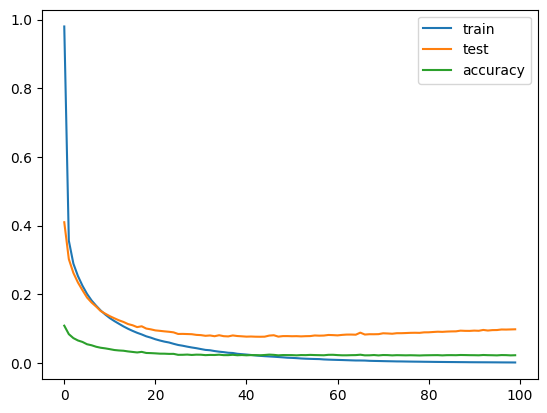

In [192]:
plt.figure()
plt.plot(D1[0],label = "train")
plt.plot(D1[1],label = "test")
plt.plot(D1[2],label = "accuracy")
plt.legend()

In [193]:
# depth = 5 parameters
depth = 5
lr = 0.001
# initialize model
net5 = Network(dim,nclass,width,depth)
#send to GPU
net5 = net5.to(device) 
#train it
D5 = train_model(net5,batch_size,lr,num_epochs,train_set_mnist,test_set_mnist)
#print(f"Final training loss for depth = 5: {D5[0]:.04}, final test loss for depth = 5: {D5[1]:.04}")

Epoch: 001 | Train Loss: 1.212 |Test Loss: 0.4612 | Test Error: 0.1328
Epoch: 002 | Train Loss: 0.3786 |Test Loss: 0.3083 | Test Error: 0.0885
Epoch: 003 | Train Loss: 0.2681 |Test Loss: 0.2375 | Test Error: 0.0702
Epoch: 004 | Train Loss: 0.2107 |Test Loss: 0.1944 | Test Error: 0.0579
Epoch: 005 | Train Loss: 0.1716 |Test Loss: 0.1662 | Test Error: 0.0482
Epoch: 006 | Train Loss: 0.146 |Test Loss: 0.1525 | Test Error: 0.0434
Epoch: 007 | Train Loss: 0.1237 |Test Loss: 0.1362 | Test Error: 0.0391
Epoch: 008 | Train Loss: 0.1101 |Test Loss: 0.1367 | Test Error: 0.0413
Epoch: 009 | Train Loss: 0.0989 |Test Loss: 0.1272 | Test Error: 0.0374
Epoch: 010 | Train Loss: 0.09169 |Test Loss: 0.1198 | Test Error: 0.0364
Epoch: 011 | Train Loss: 0.0835 |Test Loss: 0.1189 | Test Error: 0.034
Epoch: 012 | Train Loss: 0.07137 |Test Loss: 0.1061 | Test Error: 0.0311
Epoch: 013 | Train Loss: 0.06597 |Test Loss: 0.1054 | Test Error: 0.03
Epoch: 014 | Train Loss: 0.06019 |Test Loss: 0.1022 | Test Error: 

In [194]:
D5_min_train = np.argmin(D5[0])
D5_min_test = np.argmin(D5[1])
print(f"Best training loss for depth = 1: {D5[0][D5_min_train]:.04}, best test loss for depth = 1: {D5[1][D5_min_test]:.04}")

Best training loss for depth = 1: 1.157e-05, best test loss for depth = 1: 0.09988


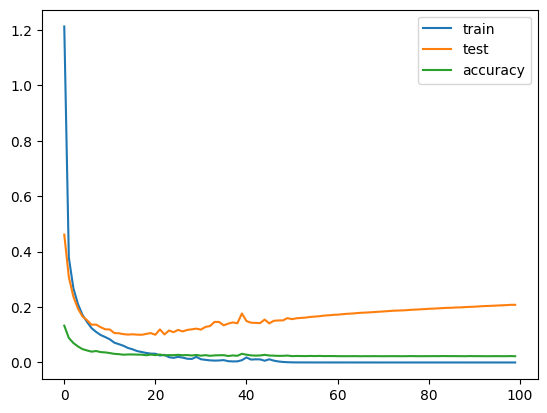

In [195]:
plt.figure()
plt.plot(D5[0],label = "train")
plt.plot(D5[1],label = "test")
plt.plot(D5[2],label = "accuracy")
plt.legend()

In [196]:
# depth = 10 parameters
depth = 10
lr = 0.001

# initialize model
net = Network(dim,nclass,width,depth)
#send to GPU
net = net.to(device)
#train it
D10 = train_model(net,batch_size,lr,num_epochs,train_set_mnist,test_set_mnist)


Epoch: 001 | Train Loss: 1.821 |Test Loss: 1.055 | Test Error: 0.4202
Epoch: 002 | Train Loss: 0.8319 |Test Loss: 0.6336 | Test Error: 0.2163
Epoch: 003 | Train Loss: 0.4993 |Test Loss: 0.3865 | Test Error: 0.1144
Epoch: 004 | Train Loss: 0.3256 |Test Loss: 0.306 | Test Error: 0.0892
Epoch: 005 | Train Loss: 0.2599 |Test Loss: 0.2408 | Test Error: 0.0671
Epoch: 006 | Train Loss: 0.2045 |Test Loss: 0.2102 | Test Error: 0.0576
Epoch: 007 | Train Loss: 0.1691 |Test Loss: 0.1849 | Test Error: 0.0506
Epoch: 008 | Train Loss: 0.1478 |Test Loss: 0.1865 | Test Error: 0.0489
Epoch: 009 | Train Loss: 0.1277 |Test Loss: 0.1596 | Test Error: 0.0408
Epoch: 010 | Train Loss: 0.1127 |Test Loss: 0.1657 | Test Error: 0.0449
Epoch: 011 | Train Loss: 0.1045 |Test Loss: 0.1702 | Test Error: 0.0457
Epoch: 012 | Train Loss: 0.09222 |Test Loss: 0.1479 | Test Error: 0.0371
Epoch: 013 | Train Loss: 0.08267 |Test Loss: 0.1446 | Test Error: 0.0368
Epoch: 014 | Train Loss: 0.07409 |Test Loss: 0.1613 | Test Error:

In [197]:
D10_min_train = np.argmin(D10[0])
D10_min_test = np.argmin(D10[1])
print(f"Best training loss for depth = 1: {D10[0][D10_min_train]:.04}, best test loss for depth = 1: {D10[1][D10_min_test]:.04}")

Best training loss for depth = 1: 0.003777, best test loss for depth = 1: 0.1415


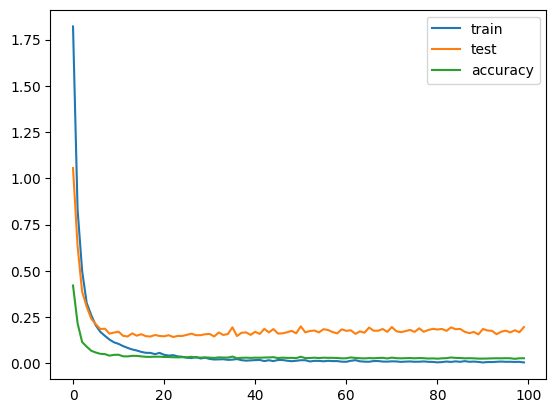

In [198]:
plt.figure()
plt.plot(D10[0],label = "train")
plt.plot(D10[1],label = "test")
plt.plot(D10[2],label = "accuracy")
plt.legend()

These results are summarized in the table below:



In [199]:
loss_list = [[1,D1[0][D1_min_train],D1[1][D1_min_test]],[5,D5[0][D5_min_train],D5[1][D5_min_test]],[10,D10[0][D10_min_train],D10[1][D10_min_test]]]
table = [["Depth", "Best train loss", "Best test loss"]] + loss_list
print(tabulate(table,headers = "firstrow",tablefmt = "fancy_grid"))

╒═════════╤═══════════════════╤══════════════════╕
│   Depth │   Best train loss │   Best test loss │
╞═════════╪═══════════════════╪══════════════════╡
│       1 │       0.0015049   │        0.0764208 │
├─────────┼───────────────────┼──────────────────┤
│       5 │       1.15691e-05 │        0.0998769 │
├─────────┼───────────────────┼──────────────────┤
│      10 │       0.00377746  │        0.141542  │
╘═════════╧═══════════════════╧══════════════════╛


We see that the 

Next, for task 7, we will analyse the test and train errors as a function of width for a 1 layer network. We shall again choose dim = 784, nclass = 10, and a learning rate of 0.001. We shall set the batch size to 1024 and vary $\text{width} \in \{4,8,16,32,64,128,256,512,1024\}$, and run each model for 100 epochs. 

In [13]:
### TASK 7 ###

#General MNIST Hyperparameters
dim = 784
nclass = 10

# Task 7 fixed hyperparameters
width = 256
lr = 0.001
batch_size = 1024
num_epochs = 100
depth = 1

In [27]:

widths = [4,8,16,32,64,128,256,512,1024]
best_loss = []
for w in widths:
    # initialize model
    net = Network(dim,nclass,w,depth)
    #send to GPU
    net = net.to(device)
    #train it
    out = train_model(net,batch_size,lr,100,train_set_mnist,test_set_mnist)
    #find best train and test loss
    out_min_train = np.argmin(out[0])
    out_min_test = np.argmin(out[1])
    best_loss.append([w,out[0][out_min_train],out[1][out_min_test]])

Epoch: 001 | Train Loss: 2.093 |Test Loss: 1.813 | Test Error: 0.6
Epoch: 002 | Train Loss: 1.658 |Test Loss: 1.492 | Test Error: 0.5117
Epoch: 003 | Train Loss: 1.4 |Test Loss: 1.264 | Test Error: 0.3819
Epoch: 004 | Train Loss: 1.194 |Test Loss: 1.075 | Test Error: 0.3239
Epoch: 005 | Train Loss: 1.028 |Test Loss: 0.9303 | Test Error: 0.2627
Epoch: 006 | Train Loss: 0.9044 |Test Loss: 0.8296 | Test Error: 0.2274
Epoch: 007 | Train Loss: 0.818 |Test Loss: 0.7598 | Test Error: 0.2125
Epoch: 008 | Train Loss: 0.7592 |Test Loss: 0.7113 | Test Error: 0.2007
Epoch: 009 | Train Loss: 0.7178 |Test Loss: 0.677 | Test Error: 0.189
Epoch: 010 | Train Loss: 0.6874 |Test Loss: 0.6516 | Test Error: 0.1828
Epoch: 011 | Train Loss: 0.6649 |Test Loss: 0.6317 | Test Error: 0.1781
Epoch: 012 | Train Loss: 0.6466 |Test Loss: 0.616 | Test Error: 0.1728
Epoch: 013 | Train Loss: 0.6319 |Test Loss: 0.6025 | Test Error: 0.1684
Epoch: 014 | Train Loss: 0.62 |Test Loss: 0.5928 | Test Error: 0.1667
Epoch: 015 |

In [41]:
table = [["Depth", "Best train loss", "Best test loss"]] + best_loss
print(tabulate(table,headers = "firstrow",tablefmt = "fancy_grid"))


╒═════════╤═══════════════════╤══════════════════╕
│   Depth │   Best train loss │   Best test loss │
╞═════════╪═══════════════════╪══════════════════╡
│       4 │       0.460914    │        0.467468  │
├─────────┼───────────────────┼──────────────────┤
│       8 │       0.228861    │        0.263922  │
├─────────┼───────────────────┼──────────────────┤
│      16 │       0.117528    │        0.160236  │
├─────────┼───────────────────┼──────────────────┤
│      32 │       0.0361931   │        0.109611  │
├─────────┼───────────────────┼──────────────────┤
│      64 │       0.00833669  │        0.0889884 │
├─────────┼───────────────────┼──────────────────┤
│     128 │       0.00153551  │        0.0746149 │
├─────────┼───────────────────┼──────────────────┤
│     256 │       0.000413627 │        0.0656403 │
├─────────┼───────────────────┼──────────────────┤
│     512 │       0.000170857 │        0.063129  │
├─────────┼───────────────────┼──────────────────┤
│    1024 │       8.44062e-05 │

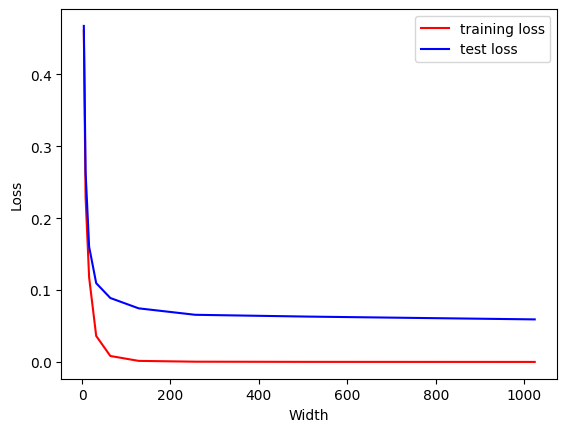

In [43]:
best_loss_np = np.array(best_loss)
plt.plot(best_loss_np[:,0],best_loss_np[:,1],"r", label = "training loss")
plt.plot(best_loss_np[:,0],best_loss_np[:,2],"b",label = "test loss")
plt.xlabel("Width")
plt.ylabel("Loss")
plt.legend()
plt.show()


***
***

## Part 4: The link between Neural Networks and Gaussian Processes [8 points]

### Part 4.1: Proving the relationship between a Gaussian process and a neural network [4 points]

### Task 1: Proper weight scaling

The variances are chosen in this way to ensure the stability of the variance of the activations for each layer. This is because, when finding the distribution for each activation in layer l, when the CLT is applied, it leads to a multiplicative factor $N_{l-1}, which would lead to variances that grow with each layer. Hence, in order to stabilise this, the variances of the weight are given this form.

### Task 2: Derive the GP relation for a single hidden layer

We have the output layer $f_i^{(2)}(x) = \sum_{j=1}^{N_1}w_{ij}^{(2)}g_{j}^{(1)}(x)+b_i^{(2)}$, $i = 1,...,N_2$.

Here, the post activations $g_j^{(2)}$ are independent, due to the iid weight and bias parameters.


First, we consider each hidden unit in the sum:

$\mathbb{E}[w_{ij}^{(2)}g_{j}^{(1)}(x)] =\mathbb{E}[w_{ij}^{(2)}]\mathbb{E}[g_{j}^{(1)}(x)] = 0$, because the weights in this layer are independent from the weights and bias in the previous layer (which determine g), and since $\mathbb{E}[w_{ij}^{(2)}] = 0$

$\text{Var}(w_{ij}^{(2)}g_{j}^{(1)}(x)) = \mathbb{E}[(w_{ij}^{(2)}g_{j}^{(1)}(x))^2] = \mathbb{E}[w_{ij}^{(2)2}]\mathbb{E}[g_{j}^{(1)}(x)^2] = \frac{\sigma_w^{(2)}}{N_1}\mathbb{E}[g_{j}^{(1)}(x)^2] $.

Then by the CLT, $\sum_{j=1}^{N_1}w_{ij}^{(2)}g_{j}^{(1)}(x)$ is a sum of iid variables hence is gaussian with mean 0 and variance $\sigma_w^{(2)}\mathbb{E}[g_{j}^{(1)}(x)^2]$.

This means, since $b_i^{(2)}$ is also Gaussian, independent from the sum, that $f_i^{(2)}(x)$ is Gaussian with mean 0 and variance $\sigma_b^{(2)} + \sigma_w^{(2)}\mathbb{E}[g^{(1)}(x)^2]$, where we drop the subscript on the expectation since it is the same for all $j$.

Now, we generalize to any collection of inputs and outputs eg $f_i^{(2)}(x), f_k^{(2)}(x'),...$.



First, by the above, if this collection is stacked into a vector, then this vector will have mean 0 by the above argument.

Next, we consider the covariance matrix for this vector:

$\text{Cov}(w_{ij}^{(2)}g_{j}^{(1)}(x),w_{kj}^{(2)}g_{j}^{(1)}(x')) = \mathbb{E}[w_{ij}^{(2)}g_{j}^{(1)}(x)w_{kj}^{(2)}g_{j}^{(1)}(x')] =  \mathbb{E}[w_{ij}^{(2)}w_{kj}^{(2)}] \mathbb{E}[g_{j}^{(1)}(x)g_{j}^{(1)}(x')]$ due to the independence of the weights from the weights and bias in the previous layer as above. Clearly this is 0 unless $i = k$, in which case:

$\text{Cov}(w_{ij}^{(2)}g_{j}^{(1)}(x),w_{ij}^{(2)}g_{j}^{(1)}(x')) = \frac{\sigma_w^{(2)}}{N_1}\mathbb{E}[g_{j}^{(1)}(x)g_{j}^{(1)}(x')]$.

Hence, using the multivariate CLT, $(\sum_{j=1}^{N_1}w_{ij}^{(2)}g_{j}^{(1)}(x),\sum_{j=1}^{N_1}w_{ij}^{(2)}g_{j}^{(1)}(x'),...)$ is Gaussian with mean 0 and covariance matrix defined by

$\text{Cov}(\sum_{j=1}^{N_1}w_{ij}^{(2)}g_{j}^{(1)}(x),\sum_{j=1}^{N_1}w_{ij}^{(2)}g_{j}^{(1)}(x')) = \sigma_w^{(2)}\mathbb{E}[g^{(1)}(x)g^{(1)}(x')]$


Finally, we consider the bias term, which is added to the vector of sums, which we construct to be the vector containing the bias $b_i^{(2)}$ where $i$ corresponds to the output in question. This vector is Gaussian with mean 0 and covariance matrix given by $\sigma_b^{(2)}$ for all entries with the same $i$.

Thus, $(f_i^{(2)}(x), f_i^{(2)}(x'),...)$ is multivariate Gaussian with mean 0 and covariance $ \sigma_b^{(2)} +\sigma_w^{(2)}\mathbb{E}[g^{(1)}(x)g^{(1)}(x')]$. Again, any outputs with non-matching index, regardless of the input, have a covariance of 0.

Since this was for any collection, meaning any collection is jointly mulitvariate Gaussian, we conclude that $f_{i}^{(2)}(x)$ follow a Gaussian proess, with mean $\mu^{1} = 0$, and covariance matrix $K^1$  st $k^1 (x,x')=  \sigma_b^{(2)} +\sigma_w^{(2)}\mathbb{E}[g^{(1)}(x)g^{(1)}(x')]$, in the limit that $N_1 \to \infty$.

Note that in this question, the expectations were taken over the unknown parameters in the previous layer and this layer.


### Task 3: Why in succession

We apply the limits in succession since, in order to apply the logic iteratively, we require that the previous layer has post activations that are distributed as GPs. In order for this to happen, we require that the previous layer's width has already increased to infinity.

### Task 4: Derive the GP relation for multiple hidden layers

The output for the $l$ th layer is $f_i^{(l)}(x) = \sum_{j=1}^{N_{l-1}}w_{ik}^{(l)}g_j^{(l-1)}(x) + b_i^{(l)}$, where $g_j^{(l-1)}(x) = \phi(f_j^{(l-1)}(x))$.

Taking a very similar approach to before, if we consider each term in the summation $w_{ij}^{(l)}g_j^{(l-1)}$, we see that $\mathbb{E}[w_{ij}^{(l)}g_j^{(l-1)}] = \mathbb{E}[w_{ij}^{(l)}]\mathbb{E}[g_j^{(l-1)}] = 0$ since the expectation of the weight is 0 and the two are independent.

Also, 

$\text{Cov}(w_{ij}^{(l)}g_{j}^{(l-1)}(x),w_{ij}^{(l)}g_{j}^{(l-1)}(x')) = \mathbb{E}[w_{ij}^{(l)}g_{j}^{(l-1)}(x)w_{ij}^{(l)}g_{j}^{(1)}(x')] =  \mathbb{E}[w_{ij}^{(l)}w_{ij}^{(l)}] \mathbb{E}[g_{j}^{(l-1)}(x)g_{j}^{(l-1)}(x')] = \frac{\sigma_w^{(l)}}{N_{l-1}}\mathbb{E}[g_{j}^{(l-1)}(x)g_{j}^{(l-1)}(x')]$ due to the independence of the weights from the weights and bias in the previous layer as above. 

Since $f_j^{(l-1)}(x)$ is a GP over the inputs, this means that $g_j^{(l-1)}(x)$ are iid given the input. Hence, $w_{ij}^{(l)}g_{j}^{(l-1)}(x)$ are also iid, since $w_{ij}^{(l)} $ are iid, independent from the gs. Thus, when we are considering collections of outputs from a layer, the vectors $(w_{ij}^{(l)}g_{j}^{(l-1)}(x), w_{ij}^{(l)}g_{j}^{(l-1)}(x'),...)^T$ are iid as we vary $j$.

Hence we can apply the multivariate CLT, that is, the sum $\sum_{j=1}^{N_{l-1}}(w_{ij}^{(l)}g_{j}^{(l-1)}(x), w_{ij}^{(l)}g_{j}^{(l-1)}(x'),...)^T$ is Gaussian with mean 0, and covariance matrix defined by $\sigma_w^{(l)}\mathbb{E}[g_{j}^{(l-1)}(x)g_{j}^{(l-1)}(x')]$ (between two of the entries).

Finally, as before, we add the bias term vector, where each component is $b_i^{(l)}$, which is Gaussian with mean 0 and covariance matrix given by a matrix of the same dimension as the covariance matrix for the sum, but filled with $\sigma_b^{(l)}$.

Hence, since this was for any length collection, the collection $f_i^{(l)}(x)$ is a Gaussian process with mean $\mu_{l-1} = 0$, and covariance matrix $K^{(l-1)}$, which is the matrix of covariances from $k^{(l-1)}(x,x') = \sigma_b^{(l)}+\sigma_w^{(l)}\mathbb{E}[g^{(l-1)}(x)g^{(l-1)}(x')]$, where again we drop the subscript since the expectation product is the same for every $j$.

As for a recursive expression, we can write the covariance as 

$k^{(l-1)}(x,x') = \sigma_b^{(l)}+\sigma_w^{(l)}\mathbb{E}[g^{(l-1)}(x)g^{(l-1)}(x')] = \sigma_b^{(l)}+\sigma_w^{(l)}\mathbb{E}_{f^{(l-1)} \sim GP(0,K^{(l-2)})}[g^{(l-1)}(x)g^{(l-1)}(x')] $ 

Hence the integral would be performed over the distribution of the previous outputs, which form a Gaussian process with mean 0 and variance $K^{(l-2)}$, hence this is an iterative expression.

***

### Part 4.2: Analysing the performance of the Gaussian process and a neural network [4 points]

We shall choose the two labels "cat" and "ship" for this analysis. These correspond to labels 3 and 8. 

In [3]:
torch.set_default_dtype(torch.float64)

# sort out the data
train_data = train_set_cifar.data
train_labels = np.array(train_set_cifar.targets)
#pick the 2 classes
idx = np.where((train_labels==3) | (train_labels==8) )
train_data = train_data[idx]
train_labels = train_labels[idx]
print(train_labels.shape)

#this means we have 10000 data points, so we randomly sample:
sample = np.random.randint(0,train_labels.shape[0],size = 1000)
train_data = train_data[sample]
train_labels = train_labels[sample]
#check imbalance
print(train_labels[train_labels == 3].shape[0])
#this is roughly balanced

#put in tensors and scale to (0,1)
train_data = torch.tensor(train_data,dtype = torch.float64)
train_labels = torch.tensor(train_labels,dtype = torch.float64)
train_data = train_data / 255

#flatten
train_data = torch.flatten(train_data,1,3)


(10000,)
501


In [4]:
### TASK 0 ###

#change the class labels to -0.5 for cat and 0.5 for dog:
train_labels[train_labels==3] = -0.5
train_labels[train_labels==8] = 0.5
#print(train_labels)

We shall change the output to be -0.5 for cat and 0.5 for ship, before proceeding with the analysis. Then, since we are going to be taking a regression output, whenever the model returns an output less than 0, we classify as cat, and anything greater than 0 as ship.

First, we define the kernel function, as below:

In [5]:
### Task 1 ###


def kernel(L,sigma_w,sigma_b,X1,X2):
    """
        Function that calculates the kernel for layer L

        Args:
        L - The number of layers
        sigma_w - variance of weights 
        sigma_b - variance of bias
        X1 - first dataset, size M1 x N0
        X2 - second dataset, size M2 x N0 

        Returns:
        torch.Tensor: Kernel matrix of shape (n, m).
        """
    N0 = X1.shape[1]
    #K0:
    K = sigma_b + sigma_w/N0 * torch.matmul(X1,X2.t())
    #this ensures the inner product works as intended
    K_x1x1 = sigma_b + sigma_w/N0 * torch.sum(torch.square(X1),dim=1).unsqueeze(1)
    K_x2x2 = sigma_b + sigma_w/N0 * torch.sum(torch.square(X2),dim=1).unsqueeze(1)
    #now iteratively calculate:
    for i in range(L):
        #theta for previous layer
        #we get some NaNs start to appear, so clamp this
        costheta = torch.clamp(K/torch.sqrt(torch.matmul(K_x1x1,K_x2x2.t())),min = -1+1e-6, max = 1-1e-6)

        theta = torch.arccos(costheta)
        #new K
        K = sigma_b + sigma_w/(2 * torch.pi) * torch.sqrt(torch.matmul(K_x1x1,K_x2x2.t())) * (torch.sin(theta) + (torch.pi - theta)*torch.cos(theta))
        #update inner product matrices. Noticing that in the formula, for (x,x), theta = arccos(1) = 0
        #meaning K(X,X) = sigma_b + sigma_w/2K
        K_x1x1 = sigma_b + sigma_w/2 * K_x1x1
        K_x2x2 = sigma_b + sigma_w/2 * K_x2x2
    return K

Next, we implement a method to compute the mean and covariance of the Gaussian process:

In [114]:
### Task 2 ###

class GP:
    # THIS CLASS IS ADAPTED FROM LECTURES
    def __init__(self, kernel: callable):
        """
        Initialize the Gaussian Process (GP) with a specified kernel.

        Args:
        kernel (callable): The kernel function to use in the GP.
        """
        self.k = kernel

    def posterior(self, x_star, sigma_w, sigma_b, L, X=None, y=None, sigma=0 ):
        """
        Given observations (X, y) and test points x_star, fit a GP model
        and draw posterior samples for f(x_star) from the fitted model.

        Args:
        x_star (torch.Tensor): Test points at which predictions will be made.
        sigma_w (float): weight variance
        sigma_b(float): bias variance
        L (int)- Layer
        X (torch.Tensor): Observed features.
        y (torch.Tensor): Observed response variables.
        sigma (float): Noise level in observations.

        Returns:
        torch.Tensor: Posterior samples for f(x_star).
        """

        # Compute kernel matrices
        #same format as the one we just made
        k_xs_x = self.k(L,sigma_w,sigma_b,x_star,X)
        k_x_xs = self.k(L,sigma_w,sigma_b,X,x_star)
        k_x_x = self.k(L,sigma_w,sigma_b,X,X)
        k_xs_xs = self.k(L,sigma_w,sigma_b,x_star,x_star)
   

        cov_x_x = k_x_x + sigma *  torch.eye(X.shape[0]) 
        # Compute posterior mean and covariance
        posterior_mean = torch.linalg.matmul(k_xs_x ,torch.linalg.solve(cov_x_x,y))
        posterior_var = k_xs_xs - torch.matmul(k_xs_x,torch.linalg.solve(cov_x_x,k_x_xs))
        # -----------------------------------------------------------------------------------
        # Enforce symmetry and positive definiteness that may be lost due to numerical errors
        posterior_var = (posterior_var + posterior_var.T) / 2  # Enforce symmetry
        # Add a small amount of noise to the diagonal to make the covariance matrix positive definite
        posterior_var = posterior_var + 1e-6 * torch.eye(posterior_var.shape[0])
        # -----------------------------------------------------------------------------------
        
        self.posterior_mean = posterior_mean
        self.posterior_var = posterior_var
        
        return self.posterior_mean, self.posterior_var

Now, we analyse the performance of the NNGP, measuring performance in terms of the accuracy on a test set. We use 1000 test samples from the cifar test set, making sure these 1000 samples are from the subset containing only points with label "cat" or "ship".

In [115]:
### Test data ###

#test data
test_data = test_set_cifar.data
test_labels = np.array(test_set_cifar.targets)
#pick the two classes
idx = np.where((test_labels==3) | (test_labels==8) )
test_data = test_data[idx]
test_labels = test_labels[idx]

print(test_labels.shape[0])
#we need to sample:
sample = np.random.randint(0,test_labels.shape[0],size = 1000)
test_data = test_data[sample]
test_labels = test_labels[sample]
print(test_labels[test_labels == 3].shape[0])
#this is rougly balanced

#put in tensors and scale to (0,1)
test_data = torch.tensor(test_data,dtype = torch.float64)
test_labels = torch.tensor(test_labels,dtype = torch.float64)
test_data = test_data / 255
#flatten
test_data = torch.flatten(test_data,1,3)

2000
510


We need to choose values for $\sigma_w$ and $\sigma_b$. For this, we choose a grid for both of them, this grid being $\{0.01,0.1,1,2,2.5,5,10,100\}$. We iterative over these grids, computing the posterior mean each time, and using it to classify each test point as specified above. From this, we can then compute the accuracy of the model by comparing the predicted classes to the true labels. We will choose the parameters with the best test performance.

(note we could draw posterior samples for each point and take the average for each point, however this would converge to the posterior mean since they are drawn from the posterior distribution with this mean)

We shall assume a small error variance of $0.001$

In [85]:
### Task 3 ###

#define the grids
grid = [0.01,0.1,1,2,2.5,5,10]
layers = [1,2,3,4,5,6,7,8,9,10]
#iterate
layer_best_list = []
for l in layers:
    best = ""
    best_acc = -1
    for sig_w in grid:
        for sig_b in grid:
            Gauss = GP(kernel)
            mean, var = Gauss.posterior(test_data, sig_w,sig_b,l,train_data, train_labels,sigma = 0.001)
            #make predictions based on the mean
            mean[mean>0] = 8
            mean[mean<0] = 3
            acc = sum(mean == test_labels)/mean.shape[0]
            #update if better
            if acc> best_acc:
                best_acc = acc.item()
                best = [l,sig_w,sig_b,best_acc]
    #at the end of each layer, append the best sigma and w varaince as well as the accuracy for that layer
    layer_best_list.append(best)



KeyboardInterrupt: 

We present the results below in a table:

In [101]:
table = [["Number of layers", "Best sigma_w", "Best sigma_b", "Accuracy"]] + layer_best_list
print(tabulate(table,headers = "firstrow",tablefmt = "fancy_grid"))

╒═════════╤════════════════╤════════════════╤════════════╕
│   Layer │   Best sigma_w │   Best sigma_b │   Accuracy │
╞═════════╪════════════════╪════════════════╪════════════╡
│       1 │            0.1 │           0.01 │      0.864 │
├─────────┼────────────────┼────────────────┼────────────┤
│       2 │            1   │           0.01 │      0.865 │
├─────────┼────────────────┼────────────────┼────────────┤
│       3 │            1   │           0.01 │      0.885 │
├─────────┼────────────────┼────────────────┼────────────┤
│       4 │            1   │           0.01 │      0.885 │
├─────────┼────────────────┼────────────────┼────────────┤
│       5 │           10   │           0.01 │      0.889 │
├─────────┼────────────────┼────────────────┼────────────┤
│       6 │            5   │           0.01 │      0.89  │
├─────────┼────────────────┼────────────────┼────────────┤
│       7 │            2   │           0.01 │      0.89  │
├─────────┼────────────────┼────────────────┼───────────

For each number of layers, we built models on every possible combination in the grid specified above, and have presented the best combination based on accuracy. We see that as we optimize across the layes, the accuracy increases for each best set of parameters. Which suggests that, since each layer had access to the same possible combinations of parameters, increasing the number of layers improves the performance. However, the accuracy increase per layer does seem to be increasing slowly, suggesting some form of convergence.

Despite this, we see that for every number of layers, the best $\sigma_b$ is 0.01, while $\sigma_w$ is a bit more varied. We can say that for the grid we defined, $\sigma_b = 0.01$ is definitely optimal, while it seems a bit more uncertain for $\sigma_w$. 

Going forwards, we shall choose $L=10,\sigma_w = 5, \sigma_b = 0.01$ based on the table above.

Next, for task 4, we analyse the uncertainty. We want to determine the two test samples for which the covariance is the highest and the two for which the covariance is the lowest. We do so by selecting the samples that correspond to these values in the posterior covariance matrix.

In [113]:
### Task 4 ###

Gauss = GP(kernel)
_,posterior_variance = Gauss.posterior(test_data, 5,0.01,l,train_data, train_labels,sigma = 0.001)

argmax = (posterior_variance == torch.max(posterior_variance)).nonzero()[0].numpy()
print(f"The test sample with the largest covariance had index {argmax}, making it a variance. \nThis sample had a variance of {posterior_variance[argmax[0],argmax[1]]}" )
print("Hence, since we want the 2 test samples with the largest covariance, we shall find the second largest.")
#in order to preserve indices, we replace the max index with rows and columns of 0s
posterior_variance_2 = posterior_variance[:]
posterior_variance_2[argmax[0],:] = torch.full((1000,),0)
posterior_variance_2[:,argmax[0]] = torch.full((1000,),0)
argmax_2 = (posterior_variance_2 == torch.max(posterior_variance_2)).nonzero()[0].numpy()
print(f"The test sample with the second largest covariance had index {argmax_2}, making it a variance. \nThis sample had a variance of {posterior_variance[argmax_2[0],argmax_2[1]]}" )

print('='*100)
#Now for the least
argmin = (posterior_variance == torch.min(posterior_variance)).nonzero()[0].numpy()
# we get two vectors, which makes sense since they will have the same value due to symmetry
print(f"The test samples with the smallest covariance had indices {argmin}. \nThese samples had a covariance of {posterior_variance[argmin[0],argmin[1]]}" )


2000
The test sample with the largest covariance had index [260 260], making it a variance. 
This sample had a variance of 0.19731950861879874
Hence, since we want the 2 test samples with the largest covariance, we shall find the second largest.
The test sample with the second largest covariance had index [1074 1074], making it a variance. 
This sample had a variance of 0.19066698142408608
The test samples with the smallest covariance had indices [ 679 1690]. 
These samples had a covariance of -0.012761257007786853


The computational cost of the NNGP model lies in the inversion of the matrix $K(X,X) + \sigma^2 I$. This inversion has computational complexity $O(N^3)$. Hence as the size of the training dataset increases, this inverse will become harder and harder to compute. This is why other inversion methods like the Cholesky inverse can be utilized. However, even with this method, it can become infeasible to invert should the training dataset become large enough.